### This merges results from SP_NOSP prediction and cleavage site prediction.
#### The final probability is the geometric mean of SP_NOSP prediction and prediction of having cleavage site. 

### SP_NOSP_Classifier.ipynb and Cleavage_site_prediction.ipynb first and export scored dataframes from there first!

In [1]:
import os

root_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))
os.chdir(root_dir)

In [2]:
# import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.6)
import functions

In [3]:
#SP_NOSP scored
df1 = pd.read_pickle('results/SP_NOSP_scored_STG.pkl.gz')

# 
# Cleavage site scored
df_ = pd.read_pickle('results/SP_NOSP_Cleavage_scored_100_500.pkl.gz')


df = df1.merge(df_[['Entry', 'CS_prob', 'CS_pos', 'Diff']], on='Entry')

In [4]:
df.Label.value_counts()

0    14655
1     2609
Name: Label, dtype: int64

### Extract benchmark sequences

In [5]:
df

,Entry,All,Protein,Entry name,Status,Protein names,Gene names,Organism,Length,Signal peptide,...,Cross-reference (PROSITE),Cleavage,Accession,Label,Aligned,Feat,SP_Prediction,CS_prob,CS_pos,Diff
0,F4IE66,sp|F4IE66|PRP22_ARATH Pre-mRNA-splicing factor...,MPSMAQGELKSFVQNSRPNPKSPTVSPFSMRQKIAEHRRSLPIASV...,PRP22_ARATH,reviewed,Pre-mRNA-splicing factor ATP-dependent RNA hel...,RID1 At1g26370 T1K7.25,Arabidopsis thaliana (Mouse-ear cress),717,NaN,...,PS51192;PS51194;,NaN,F4IE66|EUKARYA|NO_SP|0,0,PSMAQGELKSFVQNSRPNPKSPTVSPFSMRQKIAEHRRSLP,"[0.10999999999999892, 0.09571428571428511, 0.0...",0.00,0.07,15,NaN
1,Q8LBV4,sp|Q8LBV4|Y1814_ARATH Uncharacterized methyltr...,MPMTVVSGRFSTALLPTCFSLSRLHSVKYAAQRRVVFVSRSAHASS...,Y1814_ARATH,reviewed,"Uncharacterized methyltransferase At1g78140, c...",At1g78140 T11I11.8,Arabidopsis thaliana (Mouse-ear cress),355,NaN,...,NaN,NaN,Q8LBV4|EUKARYA|NO_SP|0,0,PMTVVSGRFSTALLPTCFSLSRLHSVKYAAQRRVVFVSRSA,"[1.8991176470588247, 1.341638655462186, 0.8829...",0.10,0.18,24,NaN
2,P47117,sp|P47117|ARP3_YEAST Actin-related protein 3 O...,MSYLNNPAVVMDNGTGLTKLGFAGNDSPSWVFPTAIATAAPSNTKK...,ARP3_YEAST,reviewed,Actin-related protein 3 (Actin-like protein AR...,ARP3 ACT4 YJR065C J1760,Saccharomyces cerevisiae (strain ATCC 204508 /...,449,NaN,...,PS01132;,NaN,P47117|EUKARYA|NO_SP|0,0,SYLNNPAVVMDNGTGLTKLGFAGNDSPSWVFPTAIATAAPS,"[-0.26294117647059045, -0.04596638655462326, 0...",0.00,0.26,41,NaN
3,Q9FIB6,sp|Q9FIB6|PS12A_ARATH 26S proteasome non-ATPas...,MGDSGKLEATIDRLLNEEKQMRLAENVAGTRKAATEILQLCFDAKD...,PS12A_ARATH,reviewed,26S proteasome non-ATPase regulatory subunit 1...,RPN5A EMB2107 MSA At5g09900 MYH9.11,Arabidopsis thaliana (Mouse-ear cress),442,NaN,...,PS50250;,NaN,Q9FIB6|EUKARYA|NO_SP|0,0,GDSGKLEATIDRLLNEEKQMRLAENVAGTRKAATEILQLCF,"[0.2223529411764731, -0.21722689075630028, -0....",0.00,0.12,35,NaN
4,Q9Y7N3,sp|Q9Y7N3|GLRX3_SCHPO Monothiol glutaredoxin-3...,MANRKIFLITSLIISLLLIHIFIFSPLNEPEKNAKAGPLGLSDVSV...,GLRX3_SCHPO,reviewed,Monothiol glutaredoxin-3,grx3 SPCC1450.06c,Schizosaccharomyces pombe (strain 972 / ATCC 2...,166,NaN,...,PS51354;,NaN,Q9Y7N3|EUKARYA|NO_SP|0,0,ANRKIFLITSLIISLLLIHIFIFSPLNEPEKNAKAGPLGLS,"[-1.021176470588236, -0.579957983193277, -0.16...",0.47,0.38,25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17259,Q9QUS4,sp|Q9QUS4|HEY2_MOUSE Hairy/enhancer-of-split r...,MKRPCEETTSESDLDETIDVGSENNYPGHATSSVMRSNSPTTTSQI...,HEY2_MOUSE,reviewed,Hairy/enhancer-of-split related with YRPW moti...,Hey2 Chf1 Herp Herp1 Hesr2 Hrt2,Mus musculus (Mouse),339,NaN,...,PS50888;PS51054;,NaN,Q9QUS4|EUKARYA|NO_SP|4,0,KRPCEETTSESDLDETIDVGSENNYPGHATSSVMRSNSPTT,"[-1.1752941176470597, -1.3573109243697483, -1....",0.00,0.10,44,NaN
17260,Q9NYY8,sp|Q9NYY8|FAKD2_HUMAN FAST kinase domain-conta...,MLTTLKPFGSVSVESKMNNKAGSFFWNLRQFSTLVSTSRTMRLCCL...,FAKD2_HUMAN,reviewed,"FAST kinase domain-containing protein 2, mitoc...",FASTKD2 KIAA0971,Homo sapiens (Human),710,NaN,...,PS51286;,NaN,Q9NYY8|EUKARYA|NO_SP|4,0,LTTLKPFGSVSVESKMNNKAGSFFWNLRQFSTLVSTSRTMR,"[1.539705882352941, 1.3084033613445376, 1.0962...",0.00,0.18,37,NaN
17261,Q9P7W1,sp|Q9P7W1|YGQ9_SCHPO Uncharacterized protein C...,MQDNQVLANTASMIMPKSSFITTKQLWEIVLQGKVEATEFIPADVS...,YGQ9_SCHPO,reviewed,Uncharacterized protein C1703.09,SPBC1703.09,Schizosaccharomyces pombe (strain 972 / ATCC 2...,202,NaN,...,NaN,NaN,Q9P7W1|EUKARYA|NO_SP|4,0,QDNQVLANTASMIMPKSSFITTKQLWEIVLQGKVEATEFIP,"[-1.486176470588235, -1.373529411764705, -1.23...",0.01,0.28,37,NaN
17262,Q9QXL2,sp|Q9QXL2|KI21A_MOUSE Kinesin-like protein KIF...,MLGAADESSVRVAVRIRPQLAKEKIEGCHICTSVTPGEPQVFLGKD...,KI21A_MOUSE,reviewed,Kinesin-like protein KIF21A,Kif21a Kiaa1708,Mus musculus (Mouse),1672,NaN,...,PS00411;PS50067;PS00678;PS50082;PS50294;,NaN,Q9QXL2|EUKARYA|NO_SP|4,0,LGAADESSVRVAVRIRPQLAKEKIEGCHICTSVTPGEPQVF,"[2.1170588235294123, 1.5340336134453785, 1.028...",0.00,0.12,21,NaN


In [6]:
benchmark = pd.read_pickle('results/signalp5_benchmark.pkl.gz')
new = df[df['Entry'].apply(lambda x: x in benchmark.Entry.values)].copy()

In [7]:
benchmark['Label'].value_counts()

0    7246
1     211
Name: Label, dtype: int64

In [8]:
new.shape, benchmark.shape

((7457, 47), (7457, 42))

### MCC using just the SP scored from N-terminal

|█████████████████████████████████████████████████░| 98% (98/100)  
Max MCC = 0.754 for threshold = 0.47000000000000003.


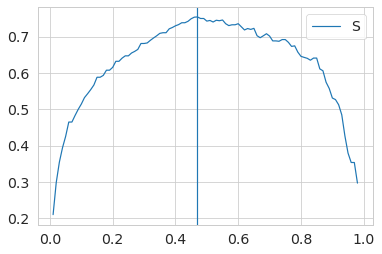

In [12]:
from sklearn.metrics import matthews_corrcoef

new['Final_prob'] = new['SP_Prediction']

mcc = []

for i, v in enumerate(np.arange(0.01, 0.99, 0.01)): #
    y_pred = new['Final_prob'].apply(lambda x: 0 if x < v else 1)
    y_true = new['Label']
    mcc.append(matthews_corrcoef(y_true, y_pred))
    functions.progress(i+1, 100)

sns.lineplot(np.arange(0.01, 0.99, 0.01), mcc, label='S')
plt.axvline(x=np.arange(0.01, 0.99, 0.01)[np.argmax(mcc)])
print('\nMax MCC = {} for threshold = {}.'.format(round(max(mcc), 3), \
                                                    np.arange(0.01, 0.99, 0.01)[np.argmax(mcc)]));

### MCC using just the cleavage site scores

|█████████████████████████████████████████████████░| 98% (98/100)  
Max MCC = 0.709 for threshold = 0.6900000000000001.


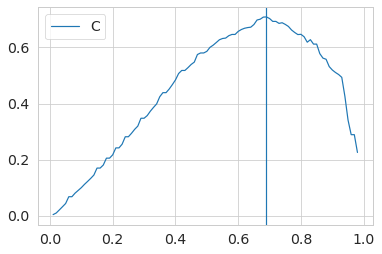

In [13]:
from sklearn.metrics import matthews_corrcoef

# new['Final_prob'] = np.sqrt(new['SP_Prediction'] * new['CS_prob'])
new['Final_prob'] = new['CS_prob']

mcc = []

for i, v in enumerate(np.arange(0.01, 0.99, 0.01)): #
    y_pred = new['Final_prob'].apply(lambda x: 0 if x < v else 1)
    y_true = new['Label']
    mcc.append(matthews_corrcoef(y_true, y_pred))
    functions.progress(i+1, 100)

sns.lineplot(np.arange(0.01, 0.99, 0.01), mcc, label='C')
plt.axvline(x=np.arange(0.01, 0.99, 0.01)[np.argmax(mcc)])
print('\nMax MCC = {} for threshold = {}.'.format(round(max(mcc), 3), \
                                                    np.arange(0.01, 0.99, 0.01)[np.argmax(mcc)]));

### MCC combining both scores

|█████████████████████████████████████████████████░| 98% (98/100)  
Max MCC = 0.831 for threshold = 0.62.


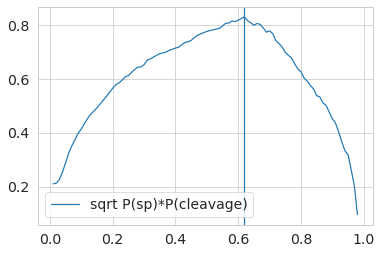

In [11]:
from sklearn.metrics import matthews_corrcoef
from scipy import stats

new['Final_prob'] = np.sqrt(new['SP_Prediction']*new['CS_prob'])

mcc = []

for i, v in enumerate(np.arange(0.01, 0.99, 0.01)): #
    y_pred = new['Final_prob'].apply(lambda x: 0 if x < v else 1)
    y_true = new['Label']
    mcc.append(matthews_corrcoef(y_true, y_pred))
    functions.progress(i+1, 100)

sns.lineplot(np.arange(0.01, 0.99, 0.01), mcc, label='sqrt P(sp)*P(cleavage)')
plt.axvline(x=np.arange(0.01, 0.99, 0.01)[np.argmax(mcc)])
print('\nMax MCC = {} for threshold = {}.'.format(round(max(mcc), 3), \
                                                    np.arange(0.01, 0.99, 0.01)[np.argmax(mcc)]));

In [11]:
#MCC, Threshold
np.max(mcc), np.arange(0.01, 0.99, 0.01)[np.argmax(mcc)]

(0.8305240584113862, 0.62)

|██████████████████████████████████████████████████| 100% (98/98)  
Completed!


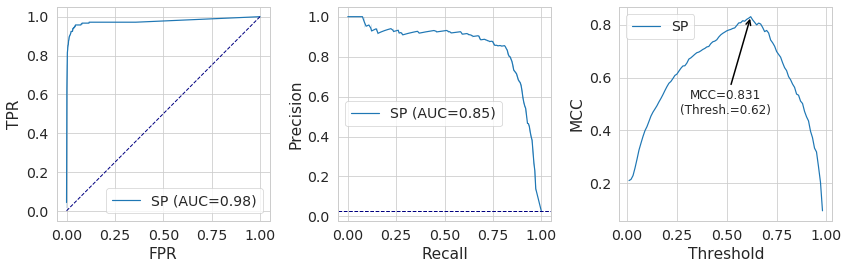

In [13]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_curve


preds = new['Final_prob']
y = new['Label']

#Precision, recall
precision, recall, _ = precision_recall_curve(y, preds, )
lr_auc = auc(recall, precision)


#ROC

fpr, tpr, _ = roc_curve(y, preds)
roc_auc = auc(fpr, tpr)



mcc = []

for i, v in enumerate(np.arange(0.01, 0.99, 0.01)):
    y_pred = [0 if x <= v else 1 for x in preds]
    mcc.append(matthews_corrcoef(y, y_pred))
    functions.progress(i+1, 98)



fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),)
sns.lineplot(fpr, tpr, label='{} (AUC={})'.format('SP', round(roc_auc, 2)), ax=ax[0])
#baseline
ax[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

sns.lineplot(recall, precision, label='{} (AUC={})'.format('SP', round(lr_auc, 2)), ax=ax[1])
#baseline
baseline = new.Label.value_counts()[1]/new.shape[0]

ax[1].axhline(y=baseline, color='navy', lw=1, linestyle='--')
ax[0].set_xlabel('FPR')
ax[0].set_ylabel('TPR')



ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')


sns.lineplot(np.arange(0.01, 0.99, 0.01), mcc, \
             label='{}'.format('SP'), ax=ax[2])
ax[2].set_xlabel('Threshold')
ax[2].set_ylabel('MCC')

y = np.arange(0.01, 0.99, 0.01)[np.argmax(mcc)]
x = max(mcc)
# plt.axvline(x=np.arange(0.01, 0.99, 0.01)[np.argmax(mcc)])
ax[2].annotate('MCC=' + str(round(x, 3)) + '\n(Thresh.=' + str(y) + ')',
        xy=(y, x), xycoords='data',
        xytext=(0.5, 0.5), textcoords='axes fraction',
        horizontalalignment="center",
        fontsize=12,
        arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3",
                        color='black',
                        lw=1.5),
        )


fig.tight_layout()
plt.savefig('figs/Benchmark_SP.pdf', bbox_inches='tight', pad_inches=0);

### Cleavage site precision and recall

In [14]:
new['Final_Predicted_Class'] = new['Final_prob'].apply(lambda x: 0 if x < \
                               np.arange(0.01, 0.99, 0.01)[np.argmax(mcc)] else 1)



false = new[new['Label'] == 0].copy()
true = new[new['Label'] == 1].copy()

false_p = false[false['Final_Predicted_Class'] == 1].copy()
true_n = false[false['Final_Predicted_Class'] == 0].copy()

false_n = true[true['Final_Predicted_Class'] == 0].copy()
true_p = true[true['Final_Predicted_Class'] == 1].copy()



csS_ = true_p.Diff.value_counts()
csp = pd.DataFrame()
csp['Distance around the\nactual cleavage site'] = csS_.index.values
csp['CS Precision'] = csS_.values/(new[new['Final_Predicted_Class'] == 1].shape[0]) #true_p.shape[0]
csp.sort_values(by='Distance around the\nactual cleavage site', inplace=True)
csp = csp.reset_index(drop=True)



csS_ = true_p.Diff.value_counts()
css = pd.DataFrame()
css['Distance around the\nactual cleavage site'] = csS_.index.values
css['CS Recall'] = csS_.values/new.Label.value_counts()[1]
css.sort_values(by='Distance around the\nactual cleavage site', inplace=True)
css = css.reset_index(drop=True)


In [15]:
#### CS precision
csp['CS Precision'].cumsum().round(3)

0     0.607
1     0.642
2     0.697
3     0.746
4     0.786
5     0.796
6     0.811
7     0.816
8     0.831
9     0.841
10    0.846
11    0.851
12    0.856
Name: CS Precision, dtype: float64

In [16]:
#### CS recall
css['CS Recall'].cumsum().round(3)

0     0.578
1     0.611
2     0.664
3     0.711
4     0.749
5     0.758
6     0.773
7     0.777
8     0.791
9     0.801
10    0.806
11    0.810
12    0.815
Name: CS Recall, dtype: float64

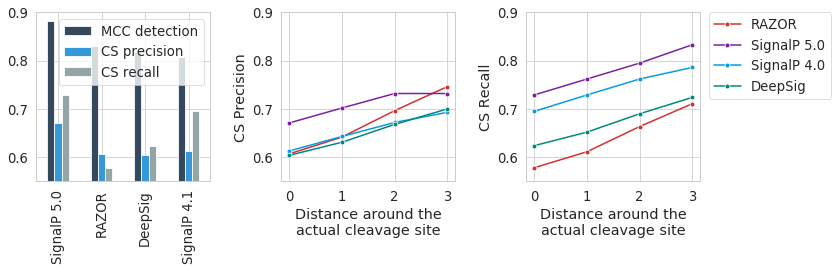

In [33]:
barplt = pd.DataFrame(columns=['MCC detection', 'CS precision', 'CS recall'], index=['RAZOR', 'SignalP 5.0', 'SignalP 4.1', 'DeepSig'])
barplt.loc['RAZOR'] = [np.max(mcc), csp['CS Precision'].cumsum().round(3)[0], css['CS Recall'].cumsum().round(3)[0]]
barplt.loc['SignalP 5.0'] = [0.883, 0.671, 0.729]
barplt.loc['SignalP 4.1'] = [0.808, 0.613, 0.695]
barplt.loc['DeepSig'] = [0.819, 0.604, 0.624]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),)
sns.set_context("paper", font_scale=1.5)
flatui = ["#d32f2f", "#7b1fa2","#039be5", "#00897b", "#43a047",  "#2ecc71" ,"#ffeb3b",  "#3498db", "#95a5a6",  "#34495e", "#3498db", "#95a5a6",  "#34495e",]


# sns.set_palette(flatui)
barplt.sort_values(ascending=False, by='MCC detection').plot(kind='bar', \
                                                                ax=ax[0], \
                                                                color=["#34495e", "#3498db", "#95a5a6",],\
                                                            )#.legend(loc='lower left', facecolor='white', framealpha=1);
ax[0].set(ylim=(0.55, 0.9))

sns.lineplot(csp['Distance around the\nactual cleavage site'][:4], csp['CS Precision'].cumsum()[:4], color=flatui[0], ax=ax[1], lw=1.5, marker="o")
sns.lineplot(csp['Distance around the\nactual cleavage site'][:4], [0.671, 0.702, 0.732, 0.732], color=flatui[1], ax=ax[1], lw=1.5, marker="o")
sns.lineplot(csp['Distance around the\nactual cleavage site'][:4], [0.613, 0.643, 0.672, 0.693], color=flatui[2], ax=ax[1], lw=1.5, marker="o")
sns.lineplot(csp['Distance around the\nactual cleavage site'][:4], [0.604, 0.631, 0.668, 0.700], color=flatui[3], ax=ax[1], lw=1.5, marker="o")
ax[1].set(ylim=(0.55, 0.9))

sns.lineplot(css['Distance around the\nactual cleavage site'][:4], css['CS Recall'].cumsum()[:4], ax=ax[2], color=flatui[0], lw=1.5, label='RAZOR', marker="o")
sns.lineplot(css['Distance around the\nactual cleavage site'][:4], [0.729, 0.762, 0.795, 0.833], label='SignalP 5.0', color=flatui[1], ax=ax[2], lw=1.5, marker="o")
sns.lineplot(css['Distance around the\nactual cleavage site'][:4], [0.695, 0.729, 0.762, 0.786], label='SignalP 4.0', color=flatui[2], ax=ax[2], lw=1.5, marker="o")
sns.lineplot(css['Distance around the\nactual cleavage site'][:4], [0.624, 0.652, 0.690, 0.724], label='DeepSig', color=flatui[3], ax=ax[2], lw=1.5, marker="o")
# ax[2].set(ylim=(0.55, 0.9))
ax[2].set(ylim=(0.55, 0.9))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



plt.tight_layout();
plt.savefig('figs/benchmarking.pdf',  bbox_inches='tight', pad_inches=0)

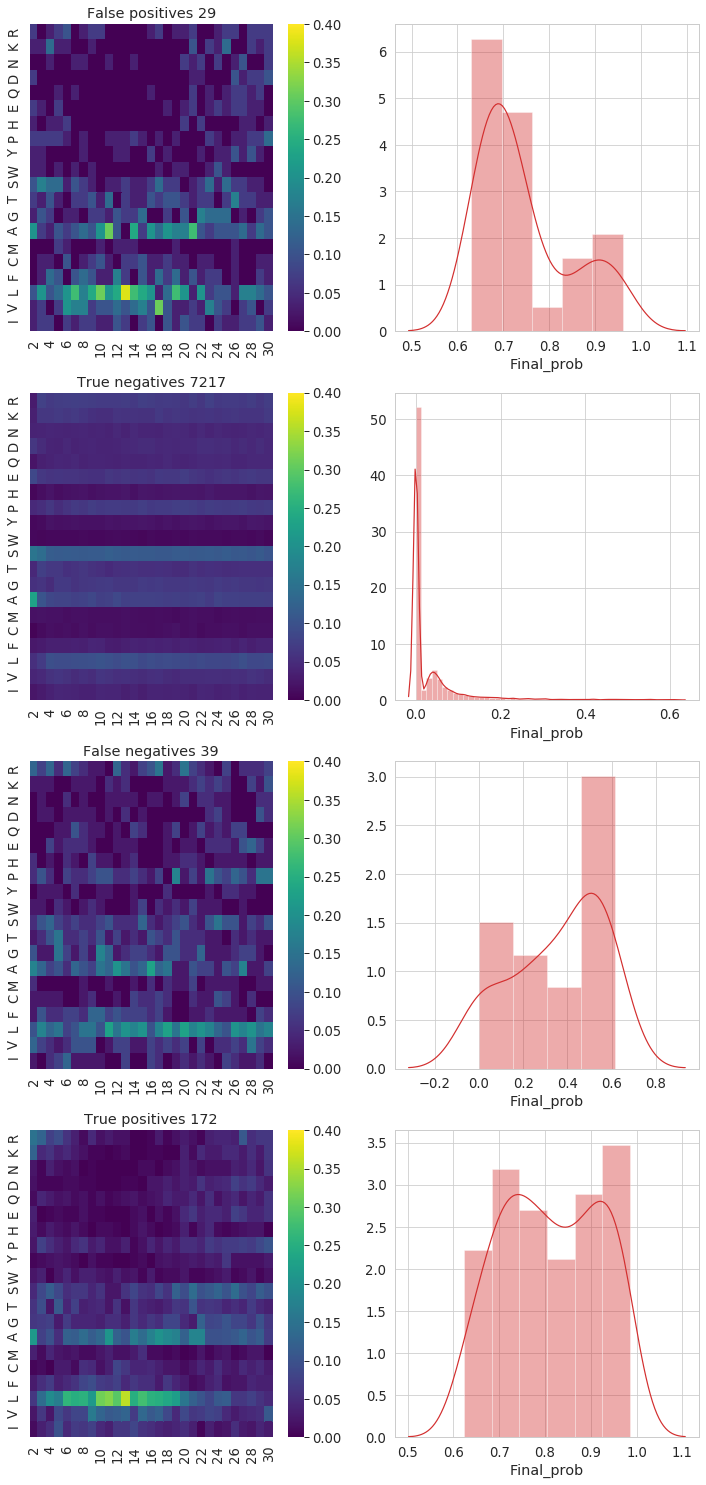

In [60]:
aa = 'RKNDQEHPYWSTGAMCFLVI'
aa = [i for i in aa]

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



false = new[new['Label'] == 0].copy()
true = new[new['Label'] == 1].copy()

false_p = false[false['Final_Predicted_Class'] == 1].copy()
true_n = false[false['Final_Predicted_Class'] == 0].copy()

false_n = true[true['Final_Predicted_Class'] == 0].copy()
true_p = true[true['Final_Predicted_Class'] == 1].copy()

titles = ['False positives {}', 'True negatives {}', 'False negatives {}', 'True positives {}']


fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 26),)


for j, v in enumerate([false_p, true_n, false_n, true_p]):
    prob_ = pd.DataFrame(columns=np.arange(1, 31), index=aa)
    hmm_df = v['Protein'].str[:30].str.split('', expand=True)[np.arange(1, 31)]
    for i in hmm_df.columns:
        all_counts = hmm_df[i].value_counts()
        for amino in aa:
            try:
                prob_.loc[amino, i] = all_counts[amino]/all_counts.sum()
            except Exception:
                prob_.loc[amino, i] = np.nan
    prob_ = prob_.fillna(0)
    sns.heatmap(prob_[np.arange(2, 31)], cmap='viridis', ax = ax[j][0], vmin=0, vmax=0.4)
    ax[j][0].set_title(titles[j].format(v.shape[0]));
    sns.distplot(v['Final_prob'], ax=ax[j][1])

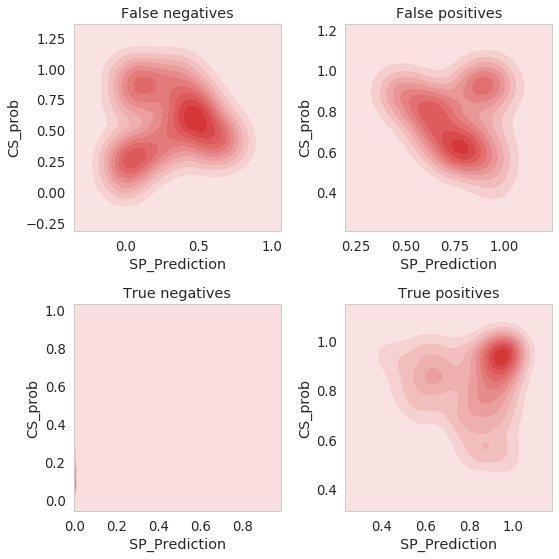

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax = axes.flatten()

sns.kdeplot(false_n['SP_Prediction'], \
           false_n['CS_prob'], shade=True, ax=ax[0])
ax[0].set_title('False negatives')
sns.kdeplot(false_p['SP_Prediction'], \
           false_p['CS_prob'], shade=True, ax=ax[1])
ax[1].set_title('False positives')

sns.kdeplot(true_n['SP_Prediction'], \
           true_n['CS_prob'], shade=True, ax=ax[2])
ax[2].set_title('True negatives')
sns.kdeplot(true_p['SP_Prediction'], \
           true_p['CS_prob'], shade=True, ax=ax[3])
ax[3].set_title('True positives')

plt.tight_layout()